In [141]:
#!pip install --upgrade great-expectations
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import great_expectations as ge
import json
from datetime import datetime

In [142]:
# Load the dataset
df = pd.read_csv('autos.csv', encoding='ISO-8859-1')
df.head()

C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\IPython\core\formatters.py:347: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\IPython\core\formatters.py:347: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [143]:
## 1. Initial Data Assessment
def initial_assessment(df):
    print("=== Initial Data Assessment ===")
    print(f"Dataset shape: {df.shape}")
    print("\nData Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nSample Data:")
    return df.head()

initial_assessment(df)

=== Initial Data Assessment ===
Dataset shape: (50000, 20)

Data Types:
dateCrawled            object
name                   object
seller                 object
offerType              object
price                  object
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
odometer               object
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

Missing Values:
dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5095
yearOfRegistration        0
gearbox                2680
powerPS                   0
model            

C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\IPython\core\formatters.py:347: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\IPython\core\formatters.py:347: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50



=== Data Profiling ===

Numeric Columns Summary:
       yearOfRegistration       powerPS  monthOfRegistration  nrOfPictures  \
count        50000.000000  50000.000000         50000.000000       50000.0   
mean          2005.073280    116.355920             5.723360           0.0   
std            105.712813    209.216627             3.711984           0.0   
min           1000.000000      0.000000             0.000000           0.0   
25%           1999.000000     70.000000             3.000000           0.0   
50%           2003.000000    105.000000             6.000000           0.0   
75%           2008.000000    150.000000             9.000000           0.0   
max           9999.000000  17700.000000            12.000000           0.0   

         postalCode  
count  50000.000000  
mean   50813.627300  
std    25779.747957  
min     1067.000000  
25%    30451.000000  
50%    49577.000000  
75%    71540.000000  
max    99998.000000  

Categorical Columns Summary:

dateCrawled:
dateC

<Figure size 1500x1000 with 0 Axes>

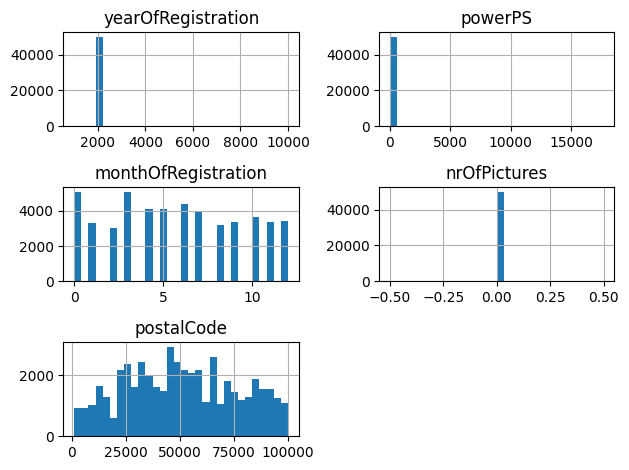

In [144]:
## 2. Data Profiling
def data_profiling(df):
    print("\n=== Data Profiling ===")
    
    # Numeric columns summary
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    print("\nNumeric Columns Summary:")
    print(df[numeric_cols].describe())
    
    # Categorical columns summary
    cat_cols = df.select_dtypes(include=['object']).columns
    print("\nCategorical Columns Summary:")
    for col in cat_cols:
        print(f"\n{col}:")
        print(df[col].value_counts(dropna=False).head())
    
    # Plot distributions
    plt.figure(figsize=(15,10))
    df[numeric_cols].hist(bins=30)
    plt.tight_layout()
    
    return df

df = data_profiling(df)

In [145]:

def validate_data(df):
    print("\n=== Data Validation ===")

    validation_results = {}

    # Convert data types
    numeric_columns = ['price', 'yearOfRegistration', 'powerPS']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, force errors to NaN
    
    # Check for missing values
    validation_results['missing_values'] = df.isnull().sum().to_dict()

    # Check price range
    validation_results['price_validity'] = {
        "within_range": ((df['price'] >= 100) & (df['price'] <= 200000)).sum(),
        "out_of_range": ((df['price'] < 100) | (df['price'] > 200000)).sum()
    }

    # Check year of registration
    current_year = datetime.now().year
    validation_results['yearOfRegistration_validity'] = {
        "within_range": ((df['yearOfRegistration'] >= 1900) & (df['yearOfRegistration'] <= current_year)).sum(),
        "out_of_range": ((df['yearOfRegistration'] < 1900) | (df['yearOfRegistration'] > current_year)).sum()
    }

    # Check powerPS
    validation_results['powerPS_validity'] = {
        "within_range": ((df['powerPS'] >= 20) & (df['powerPS'] <= 1000)).sum(),
        "out_of_range": ((df['powerPS'] < 20) | (df['powerPS'] > 1000)).sum()
    }

    # Check categorical values
    validation_results['seller_validity'] = df['seller'].isin(['private', 'dealer']).value_counts().to_dict()
    validation_results['offerType_validity'] = df['offerType'].isin(['angebot', 'other']).value_counts().to_dict()

    
    return validation_results

validate_data(df)



=== Data Validation ===


{'missing_values': {'dateCrawled': 0,
  'name': 0,
  'seller': 0,
  'offerType': 0,
  'price': 50000,
  'abtest': 0,
  'vehicleType': 5095,
  'yearOfRegistration': 0,
  'gearbox': 2680,
  'powerPS': 0,
  'model': 2758,
  'odometer': 0,
  'monthOfRegistration': 0,
  'fuelType': 4482,
  'brand': 0,
  'notRepairedDamage': 9829,
  'dateCreated': 0,
  'nrOfPictures': 0,
  'postalCode': 0,
  'lastSeen': 0},
 'price_validity': {'within_range': np.int64(0), 'out_of_range': np.int64(0)},
 'yearOfRegistration_validity': {'within_range': np.int64(49976),
  'out_of_range': np.int64(24)},
 'powerPS_validity': {'within_range': np.int64(44390),
  'out_of_range': np.int64(5610)},
 'seller_validity': {False: 50000},
 'offerType_validity': {False: 50000}}

In [146]:
## 5. Data Quality Metrics Calculation
def calculate_quality_metrics(df):
    print("\n=== Data Quality Metrics ===")
    
    metrics = {}
    
    # Completeness metrics
    total_records = len(df)
    metrics['completeness'] = {}
    for col in df.columns:
        non_null = df[col].notnull().sum()
        metrics['completeness'][col] = (non_null / total_records) * 100
    
    # Validity metrics
    metrics['validity'] = {
        'price': len(df[(df['price'] > 100) & (df['price'] < 200000)]) / total_records * 100,
        'yearOfRegistration': len(df[(df['yearOfRegistration'] >= 1900) & 
                                  (df['yearOfRegistration'] <= datetime.now().year)]) / total_records * 100,
        'powerPS': len(df[(df['powerPS'] >= 20) & (df['powerPS'] <= 1000)]) / total_records * 100
    }
    
    # Uniqueness metrics
    metrics['uniqueness'] = {
        'duplicate_rows': (total_records - len(df.drop_duplicates())) / total_records * 100,
        'unique_models_per_brand': df.groupby('brand')['model'].nunique().mean()
    }
    
    # Consistency metrics
    metrics['consistency'] = {
        'date_format_consistency': (df['dateCrawled'].apply(lambda x: isinstance(x, pd.Timestamp)).sum() / total_records) * 100,
        'categorical_consistency': (df['seller'].isin(['private', 'dealer']).sum() / total_records) * 100
    }
    
    # Save metrics to JSON
    import json
    with open('data_quality_metrics.json', 'w') as f:
        json.dump(metrics, f, indent=4)
    
    print("Quality metrics calculated and saved to data_quality_metrics.json")
    return metrics

quality_metrics = calculate_quality_metrics(df)
quality_metrics


=== Data Quality Metrics ===
Quality metrics calculated and saved to data_quality_metrics.json


{'completeness': {'dateCrawled': np.float64(100.0),
  'name': np.float64(100.0),
  'seller': np.float64(100.0),
  'offerType': np.float64(100.0),
  'price': np.float64(0.0),
  'abtest': np.float64(100.0),
  'vehicleType': np.float64(89.81),
  'yearOfRegistration': np.float64(100.0),
  'gearbox': np.float64(94.64),
  'powerPS': np.float64(100.0),
  'model': np.float64(94.484),
  'odometer': np.float64(100.0),
  'monthOfRegistration': np.float64(100.0),
  'fuelType': np.float64(91.036),
  'brand': np.float64(100.0),
  'notRepairedDamage': np.float64(80.342),
  'dateCreated': np.float64(100.0),
  'nrOfPictures': np.float64(100.0),
  'postalCode': np.float64(100.0),
  'lastSeen': np.float64(100.0)},
 'validity': {'price': 0.0, 'yearOfRegistration': 99.952, 'powerPS': 88.78},
 'uniqueness': {'duplicate_rows': 0.0,
  'unique_models_per_brand': np.float64(7.275)},
 'consistency': {'date_format_consistency': np.float64(0.0),
  'categorical_consistency': np.float64(0.0)}}


=== Preparing Monitoring Dashboard ===


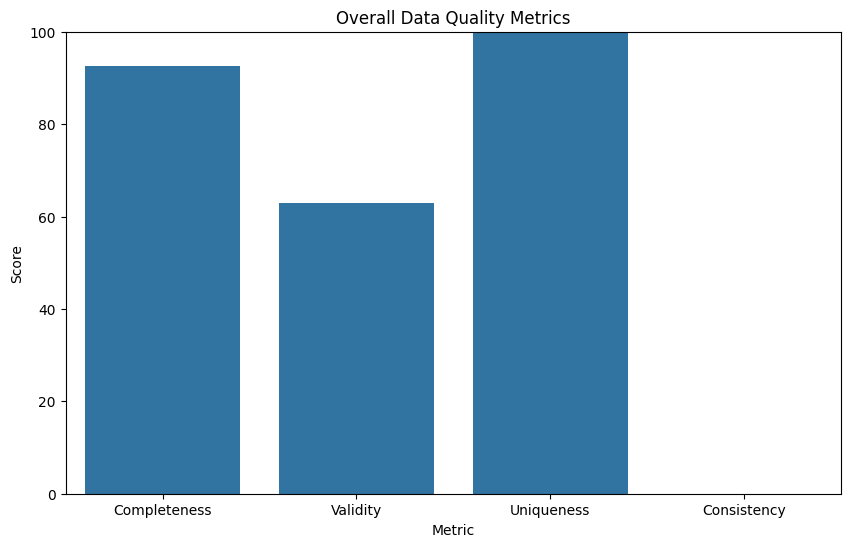

<Figure size 1200x800 with 0 Axes>

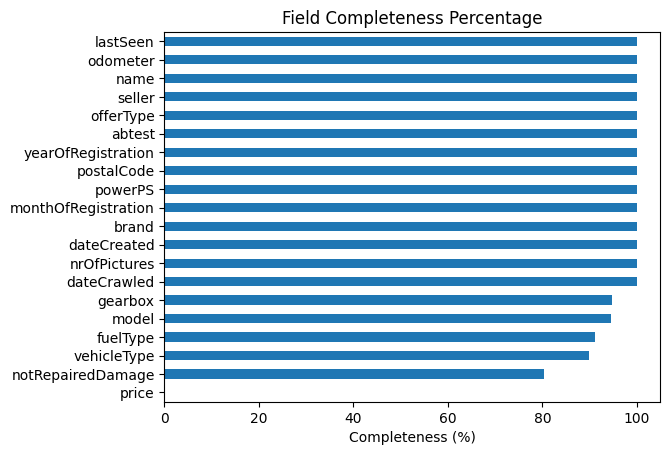

In [147]:
## 6. Monitoring Dashboard Preparation
def prepare_monitoring_dashboard(df, metrics):
    print("\n=== Preparing Monitoring Dashboard ===")
    
    # Create summary DataFrame for metrics
    metrics_df = pd.DataFrame({
        'Metric': ['Completeness', 'Validity', 'Uniqueness', 'Consistency'],
        'Score': [
            np.mean(list(metrics['completeness'].values())),
            np.mean(list(metrics['validity'].values())),
            100 - metrics['uniqueness']['duplicate_rows'],
            np.mean(list(metrics['consistency'].values()))
        ]
    })
    
    # Plot overall quality score
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Metric', y='Score', data=metrics_df)
    plt.title('Overall Data Quality Metrics')
    plt.ylim(0, 100)
    
    # Plot completeness by field
    completeness_df = pd.DataFrame.from_dict(metrics['completeness'], orient='index', columns=['Completeness'])
    completeness_df = completeness_df.sort_values('Completeness')
    
    plt.figure(figsize=(12, 8))
    completeness_df.plot(kind='barh', legend=False)
    plt.title('Field Completeness Percentage')
    plt.xlabel('Completeness (%)')
    
prepare_monitoring_dashboard(df, quality_metrics)
